In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [123]:
df=pd.read_csv("bank-marketing.csv")       
      
df.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [124]:
df.job.value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [125]:
#Drop column "contact" which is useless
df = df.drop('contact', axis=1)

# Describe the pdays column, make note of the mean, median and minimum values. Anything fishy in the values?

In [126]:
print(df.pdays.describe())

count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64


In [127]:
print(df.pdays.value_counts().head(1))

-1    36954
Name: pdays, dtype: int64


# Describe the pdays column again, this time limiting yourself to the relevant values of pdays. How different are the mean and the median values?

In [128]:
df_limit = df[df.pdays != -1]

In [129]:
df_limit.pdays.describe()

count    8257.000000
mean      224.577692
std       115.344035
min         1.000000
25%       133.000000
50%       194.000000
75%       327.000000
max       871.000000
Name: pdays, dtype: float64

pdays describe number of days that passed by after the client was last contacted from  previous campaign ,Here we are ignoring -1 values in pdays column and limiting it and then now we can campare the difference between mean and median of before and after values

there is a huge difference from the previous values ,
Previously Mean was of 40.20 and median = -1 , now after limiting -1 values we have mean=224 and median=194

In [130]:
# poutcome  describe the outcome of previous campaign which should be calculated on success and failuer 
#Delete the rows which column 'poutcome' contains 'other'
condition = df.poutcome == 'other'
df = df.drop(df[condition].index, axis = 0, inplace = False)

df[['job','education']] = df[['job','education']].replace(['unknown'],'other')

In [131]:
#  Drop customer values with 'other' education
condition3 = (df['education'] == 'other')
df = df.drop(df[condition3].index, axis = 0, inplace = False)

# Plot a horizontal bar graph with the median values of balance for each education level value. Which group has the highest median?

In [132]:
bar=df.groupby(['education'])['balance'].median()
bar

education
primary      398
secondary    387
tertiary     572
Name: balance, dtype: int64

In [133]:
print(bar.idxmax(),' has highest median value with {}'.format(bar.max()))

tertiary  has highest median value with 572


Text(0.5, 1.0, 'Grouping Education based on balance')

<Figure size 720x288 with 0 Axes>

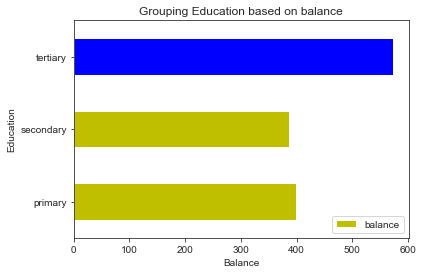

In [134]:
from matplotlib import *
import seaborn as sns
plt.figure(figsize=(10,4))
bar=pd.DataFrame(bar)
mycolors=('y','y','b')
bar.plot.barh(color=mycolors)
plt.ylabel('Education')
plt.xlabel('Balance')
plt.title('Grouping Education based on balance')

# Make a box plot for pdays. Do you see any outliers?

Text(0.5, 1.0, 'Without filtering')


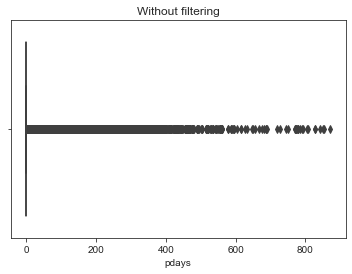

In [135]:
print(sns.boxplot(x=df['pdays']).set_title('Without filtering'))

Text(0.5, 1.0, 'With filtering pdays column')


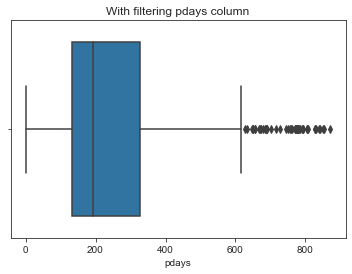

In [136]:
print(sns.boxplot(x=df_limit['pdays']).set_title('With filtering pdays column'))

 outliers which are greater thn 600 in pdayss column after filtering also.

# EXPLORATORY DATA ANALYSIS

In [137]:
import warnings
warnings.filterwarnings('ignore')

In [138]:
num_var=list(df.select_dtypes(exclude='object').columns)#separating all numerical variables
df[num_var]

,age,salary,balance,day,duration,campaign,pdays,previous
0,58,100000,2143,5,261,1,-1,0
1,44,60000,29,5,151,1,-1,0
2,33,120000,2,5,76,1,-1,0
5,35,100000,231,5,139,1,-1,0
6,28,100000,447,5,217,1,-1,0
...,...,...,...,...,...,...,...,...
45205,25,60000,505,17,386,2,-1,0
45206,51,60000,825,17,977,3,-1,0
45207,71,55000,1729,17,456,2,-1,0
45208,72,55000,5715,17,1127,5,184,3


In [139]:
cat_var=list(df.select_dtypes(exclude=[np.number]).columns)#all catagorical variables
df[cat_var]

,job,marital,education,targeted,default,housing,loan,month,poutcome,response
0,management,married,tertiary,yes,no,yes,no,may,unknown,no
1,technician,single,secondary,yes,no,yes,no,may,unknown,no
2,entrepreneur,married,secondary,yes,no,yes,yes,may,unknown,no
5,management,married,tertiary,yes,no,yes,no,may,unknown,no
6,management,single,tertiary,no,no,yes,yes,may,unknown,no
...,...,...,...,...,...,...,...,...,...,...
45205,technician,single,secondary,yes,no,no,yes,nov,unknown,yes
45206,technician,married,tertiary,yes,no,no,no,nov,unknown,yes
45207,retired,divorced,primary,yes,no,no,no,nov,unknown,yes
45208,retired,married,secondary,yes,no,no,no,nov,success,yes


# bi variate analysis

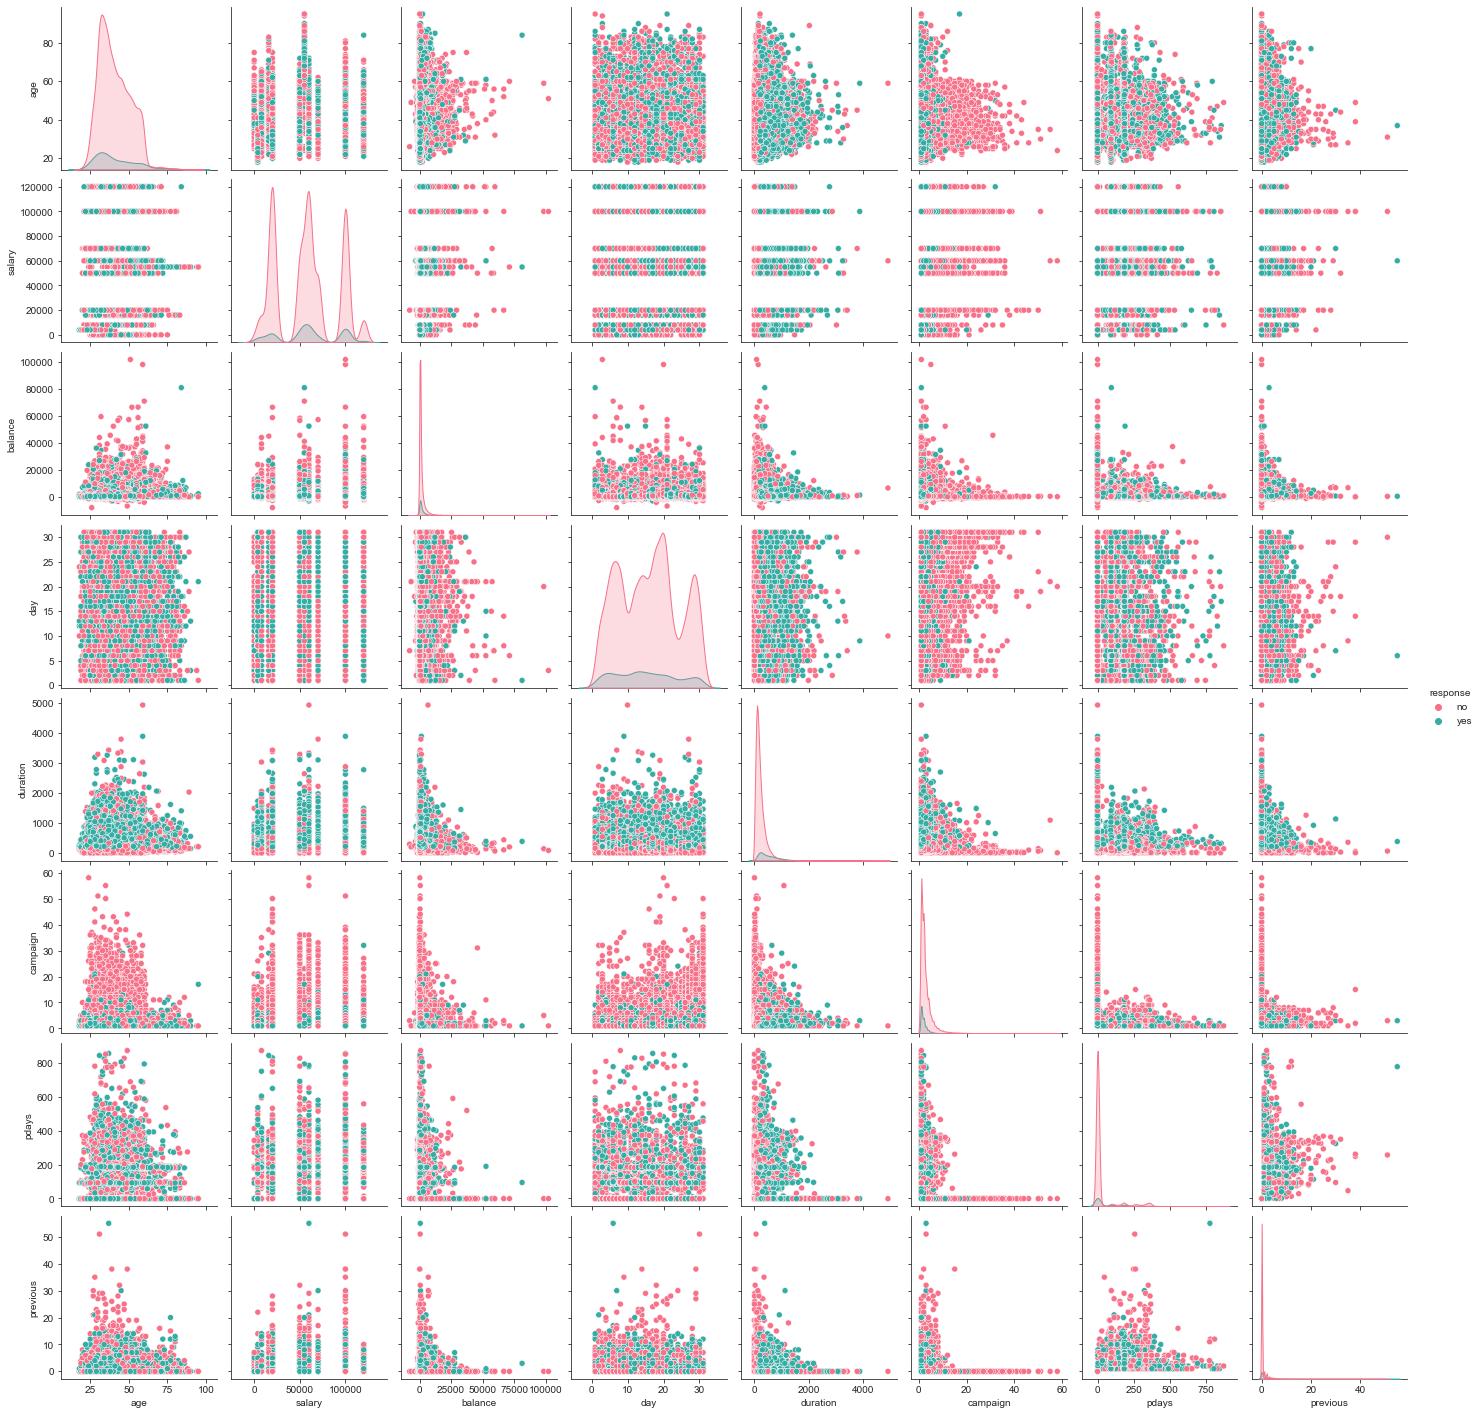

In [140]:
sns.pairplot(df, hue='response', palette="husl")

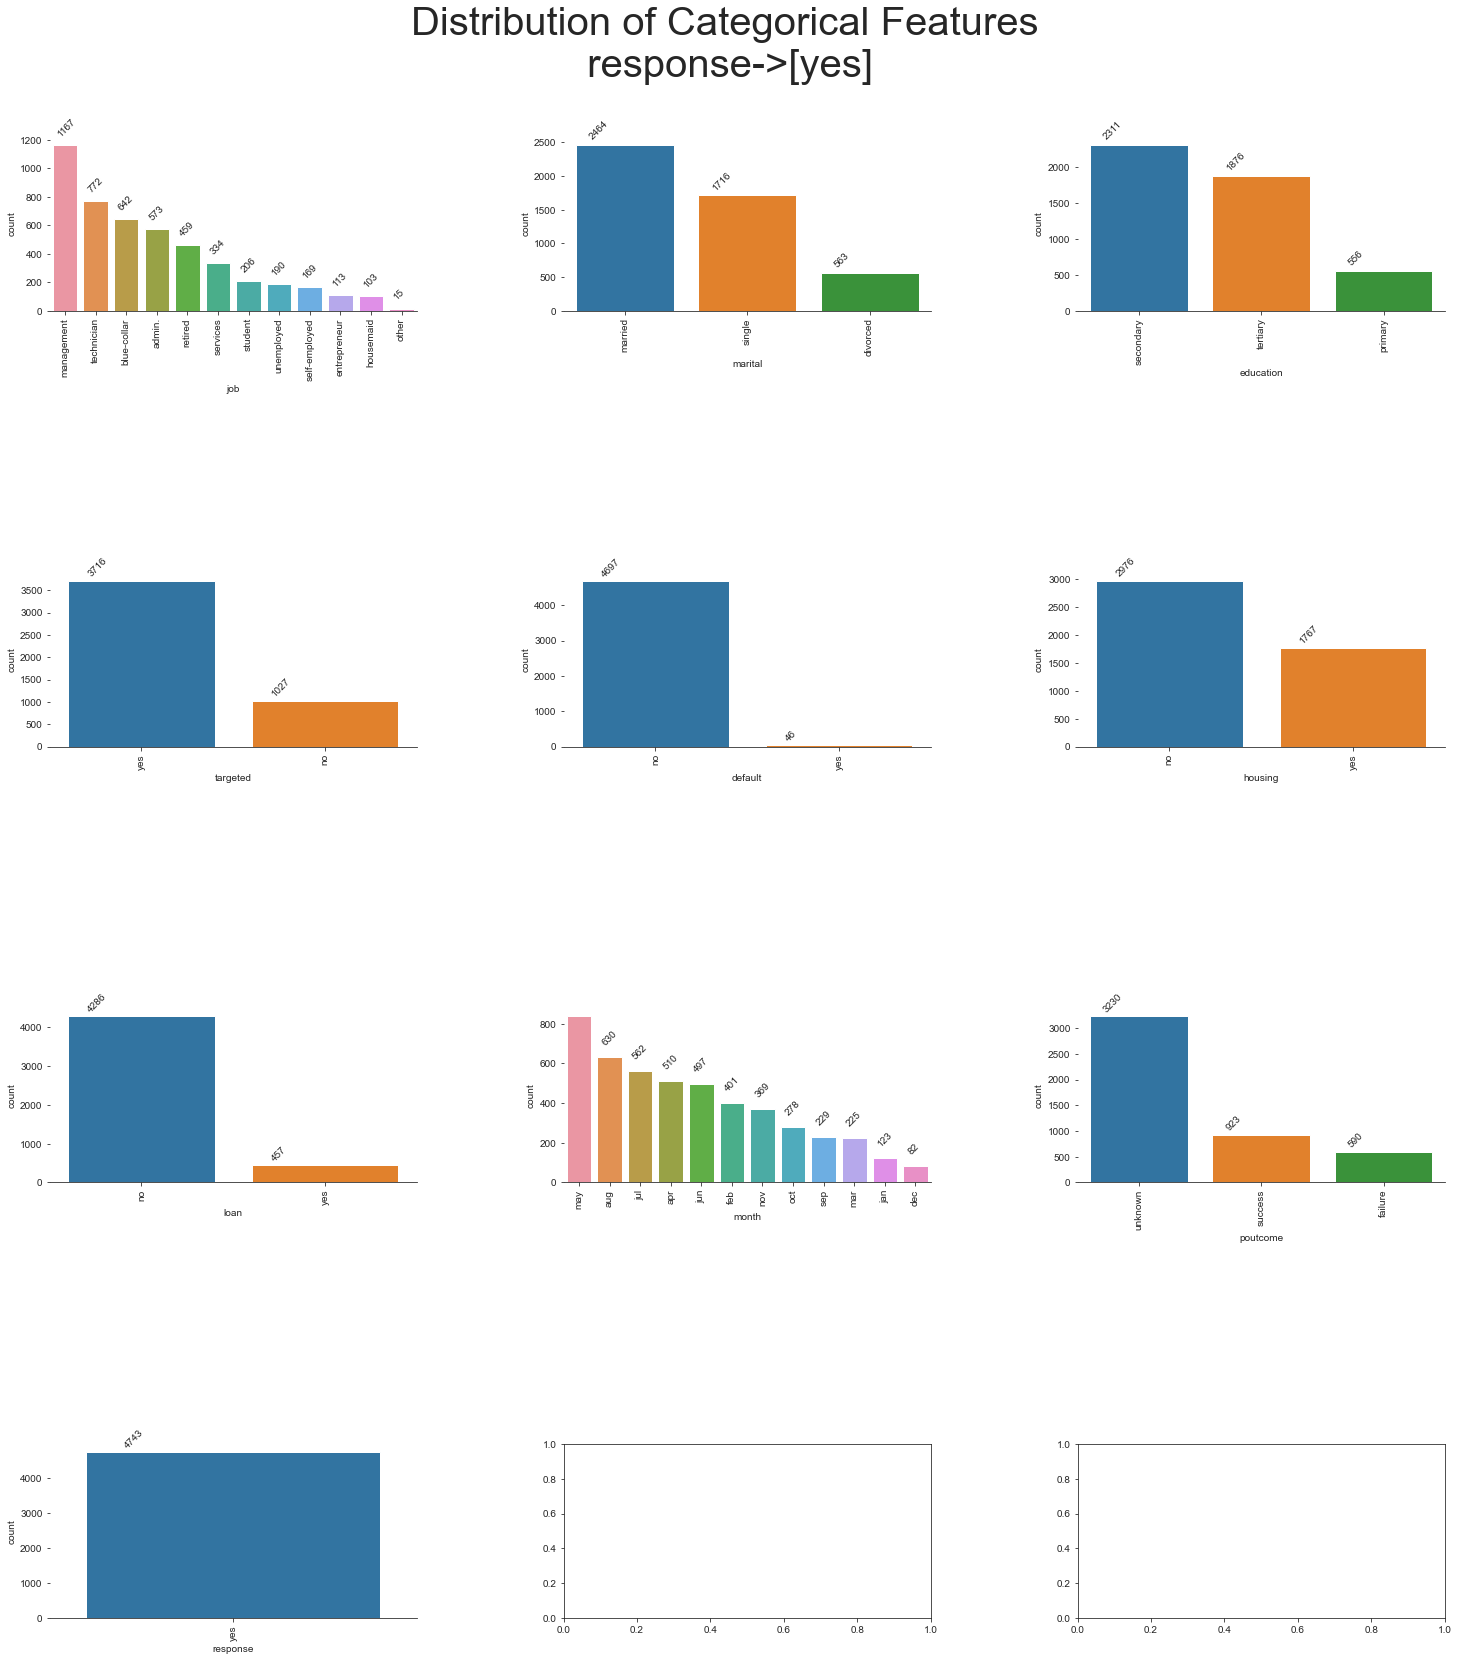

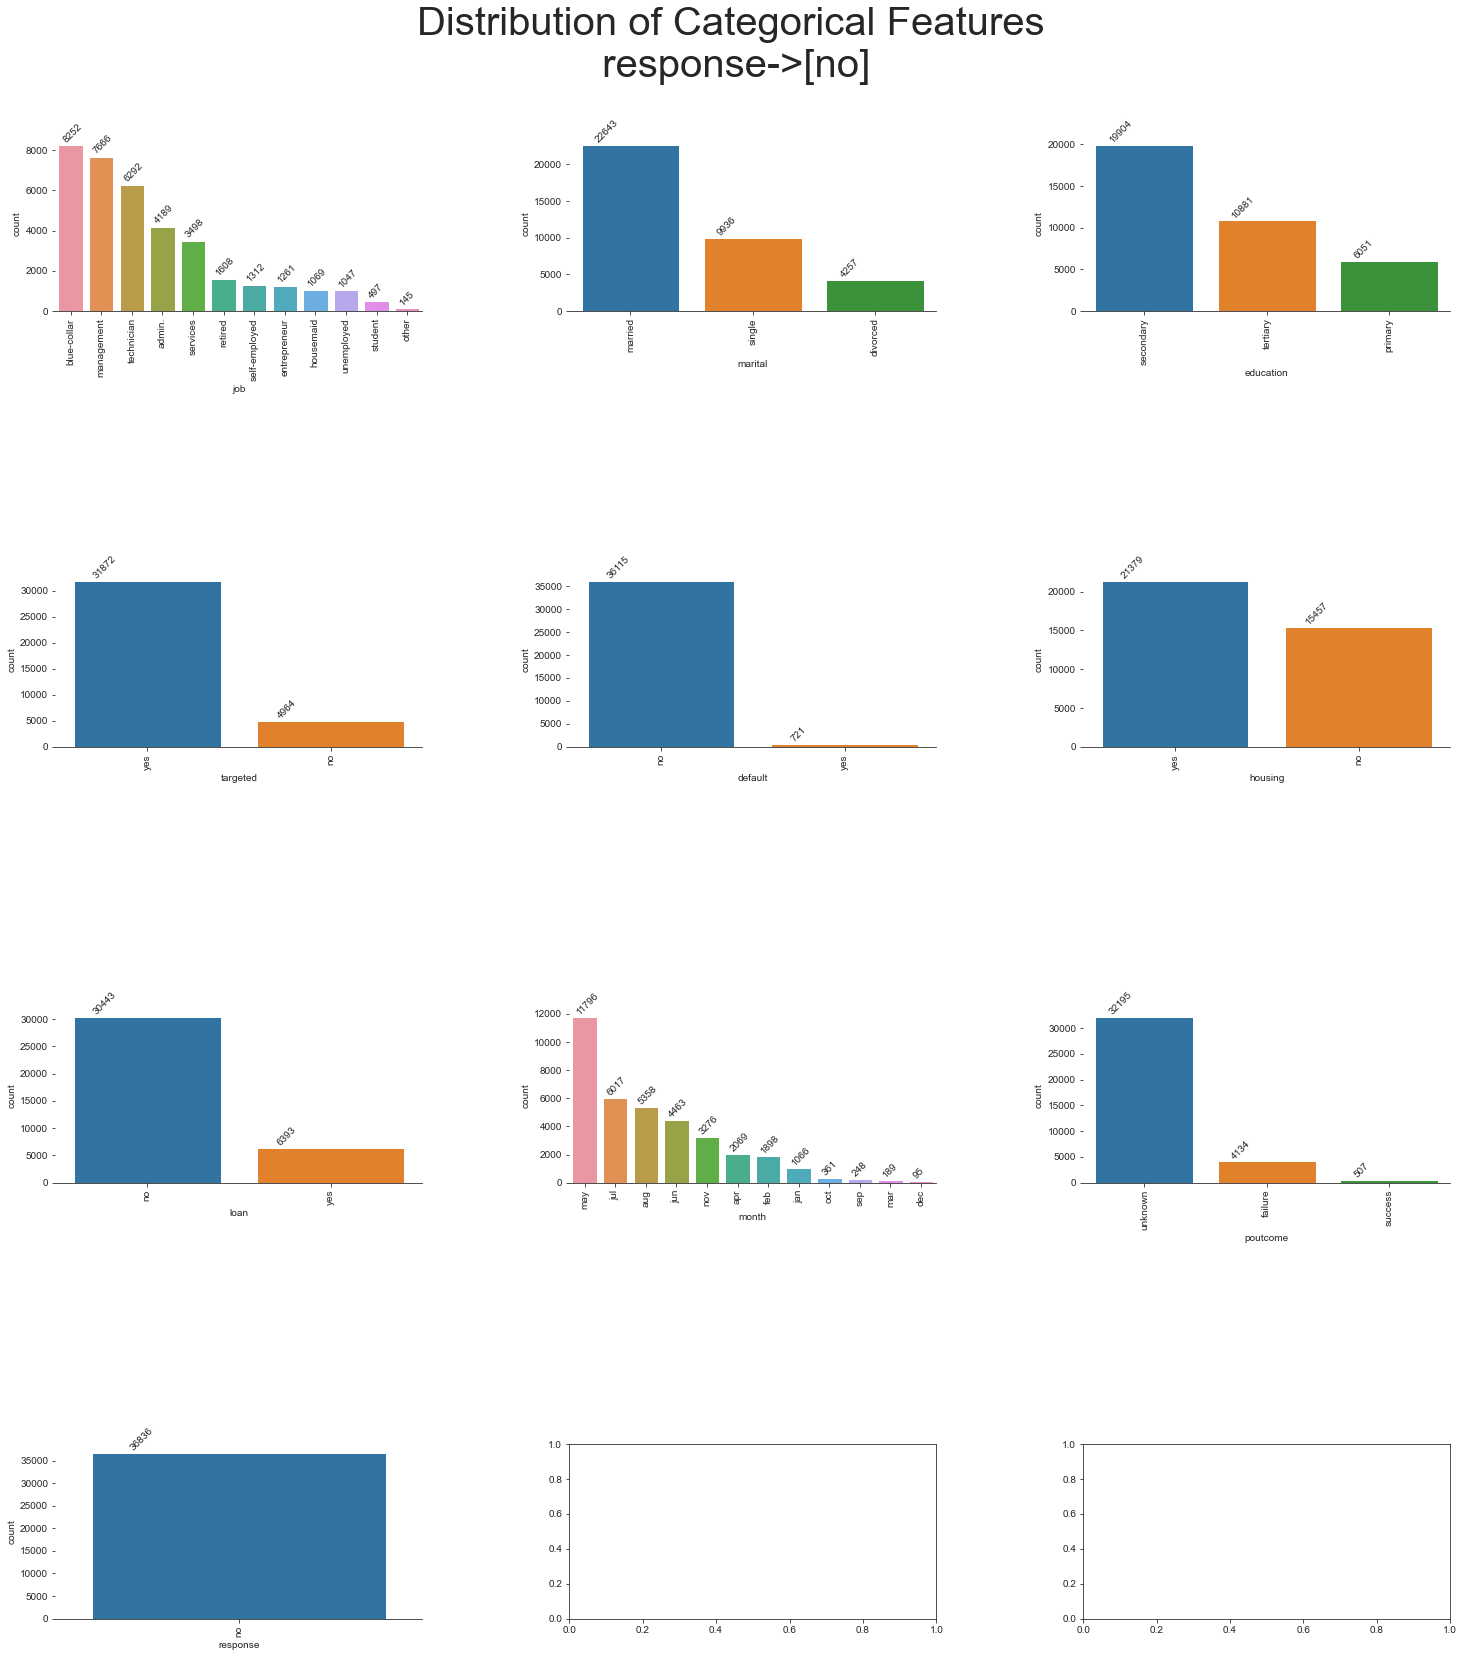

In [141]:
res=['yes','no'] #target variable is “response”.
for i in res:
    sns.set_style("ticks")
    fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(25, 21))
    fig.suptitle("Distribution of Categorical Features\n response->[{}]".format(i),
             horizontalalignment='center', y=1.05,
             verticalalignment='center', fontsize=40)
    fig.subplots_adjust(top=0.99, bottom=0.01, hspace=1.5, wspace=0.4)
    for ax, c in list(zip(axes.flat, cat_var)):        
        sns.countplot(c, data=df[df['response']=='{}'.format(i)],order= df[df['response']=='{}'.format(i)][c].value_counts().index,
                  ax=ax)
        for p in ax.patches:
            ax.annotate("{}".format(p.get_height()), (p.get_x()+0.1, p.get_height()+50),
                       ha='left', va='bottom', rotation=45)
        ax.tick_params(labelrotation=90)  
        plt.sca(ax)
        plt.yticks(rotation=0)    
         # ax.axis('off')
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_visible(True)
        ax.spines['left'].set_visible(False)

In [142]:
df_grouped = df.groupby("response")
class_name_no = "no"
class_name_yes = "yes"
df_grouped_no = df_grouped.get_group(class_name_no)
df_grouped_yes =df_grouped.get_group(class_name_yes)

Text(0, 0.5, 'Count')

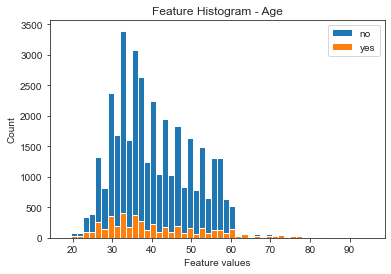

In [143]:
plt.figure()
plt.hist(df_grouped_no['age'], bins=50, label=class_name_no)
plt.hist(df_grouped_yes['age'], bins=50, label=class_name_yes)
plt.legend()
plt.title("Feature Histogram - Age")
plt.xlabel("Feature values")
plt.ylabel("Count")

<AxesSubplot:>

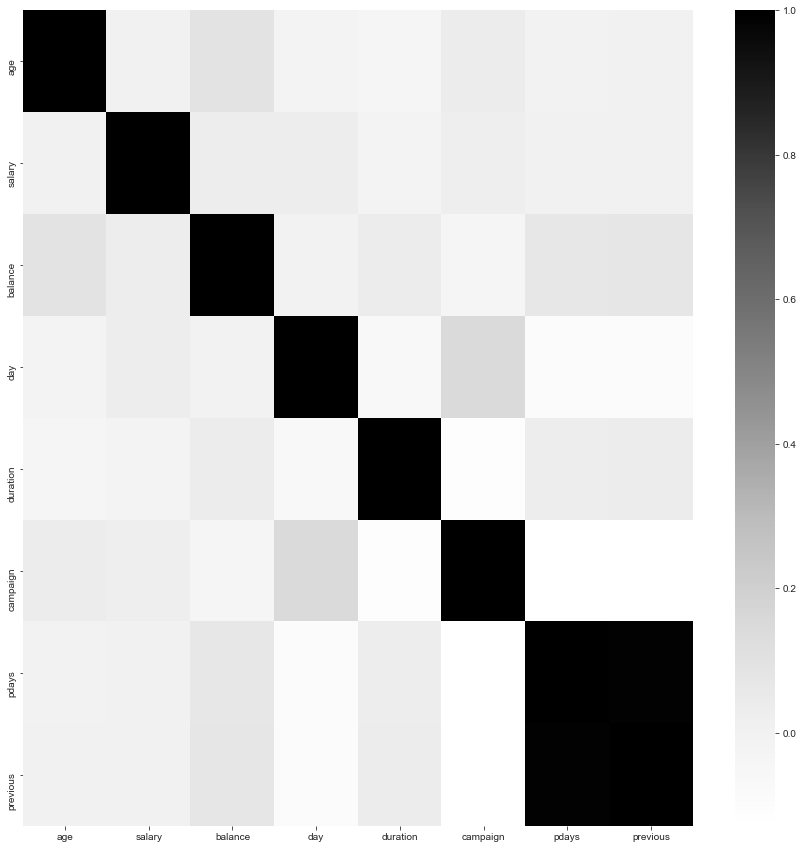

In [144]:
#HEAT MAP

f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df.corr(method='spearman'), annot=False, cmap='Greys')

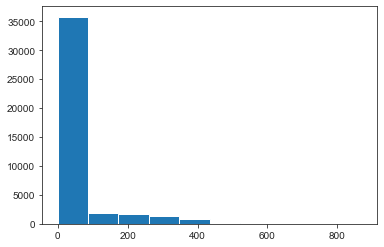

In [145]:
def drawhist(df,feature):
    plt.hist(df[feature])
drawhist(df,'pdays')

In [146]:
cat_var

['job',
 'marital',
 'education',
 'targeted',
 'default',
 'housing',
 'loan',
 'month',
 'poutcome',
 'response']

# Convert the response variable to a convenient form

In [147]:
df.response.value_counts()

no     36836
yes     4743
Name: response, dtype: int64

In [148]:
# Here we are converting this target variabe response into 0's and 1's so that it would easier for algorithm to form a model
def conver(x):
    return x.map({'no':0,'yes':1})
df[['response']]=df[['response']].apply(conver) #we can also covert catagorical values to numerical value using one hot encoding and get dummies function 

In [149]:
df.response.value_counts()

0    36836
1     4743
Name: response, dtype: int64

# Make suitable plots for associations with numerical features and categorical features’

# Associations of categorical variables

In [150]:
# these are the categorical columns
cat_var

['job',
 'marital',
 'education',
 'targeted',
 'default',
 'housing',
 'loan',
 'month',
 'poutcome',
 'response']

<AxesSubplot:xlabel='response', ylabel='count'>

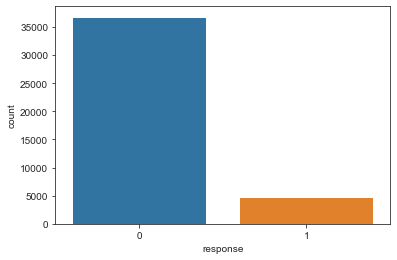

In [151]:
sns.countplot(x='response', data=df)

<AxesSubplot:xlabel='count', ylabel='job'>

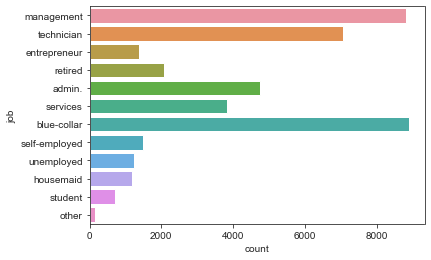

In [152]:
sns.countplot(y='job', data=df)

<AxesSubplot:xlabel='marital', ylabel='count'>

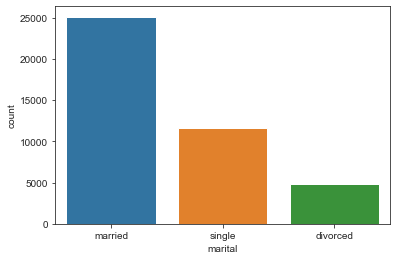

In [153]:
sns.countplot(x='marital', data=df)

<AxesSubplot:xlabel='count', ylabel='education'>

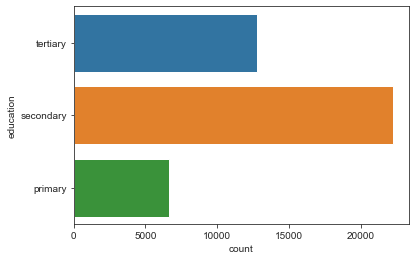

In [154]:
sns.countplot(y='education', data=df)

# Associations of numerical variables

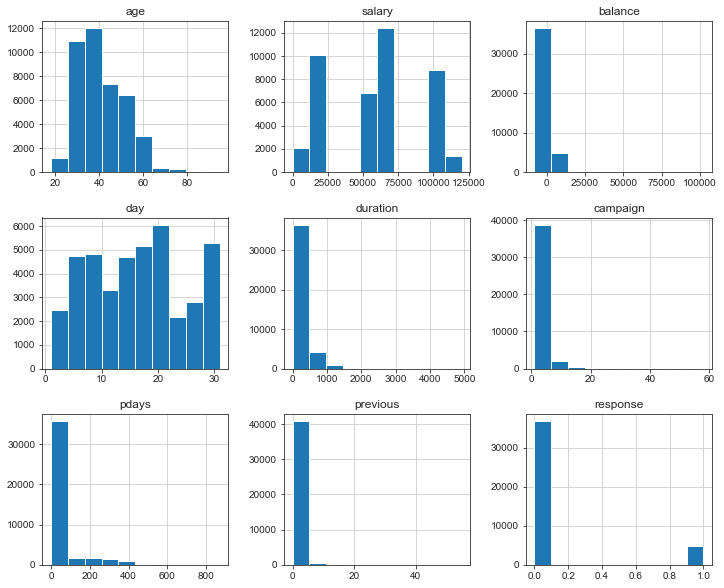

In [155]:
dist=df.hist(figsize=(12,10)) # display numerical feature distribution

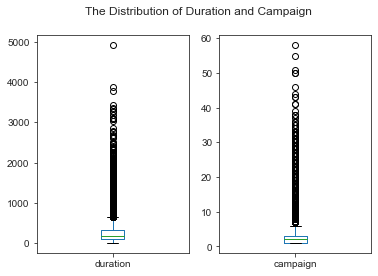

In [156]:
#distribution of duration of campaign.

dist_dur_cam = df[['duration','campaign']].plot(kind = 'box',subplots = True, layout = (1,2),sharex = False, sharey = False,title='The Distribution of Duration and Campaign')
plt.show()

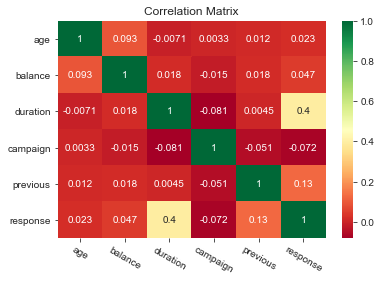

In [157]:
corr_data = df[['age','balance','duration','campaign','month','previous','response']]
corr = corr_data.corr()

cor_plot = sns.heatmap(corr,annot=True,cmap='RdYlGn')
fig.set_size_inches(6,5)
plt.xticks(fontsize=10,rotation=-30)
plt.yticks(fontsize=10)
plt.title('Correlation Matrix')
plt.show()

# This describes the relationship among age, balance, duration and campaign.

 correlation matrix was plotted with all qualitative variables. Clearly, “campaign outcome” has a strong correlation with “duration”, a moderate correlation with “previous contacts”, and mild correlations between “balance”, “month of contact” and “number of campaign”. Their influences on campaign outcome will be investigated further in the machine learning part.

In [158]:
high_corr_variables = ['poutcome']
for var in high_corr_variables:
    df[var + '_co'] = (df[var] == 'unknown').astype(int)

In [159]:
def cross_tab(df,f1,f2):
    jobs=list(df[f1].unique())
    edu=list(df[f2].unique())
    dataframes=[]
    for e in edu:
        dfe=df[df[f2]==e]
        dfejob=dfe.groupby(f1).count()[f2]
        dataframes.append(dfejob)
    a=pd.concat(dataframes,axis=1)
    a.columns=edu
    a=a.fillna(0)
    return a

cross_tab(df,'job','education')

,tertiary,secondary,primary
job,,,
admin.,548,4013,201
blue-collar,146,5132,3616
entrepreneur,668,529,177
housemaid,169,385,618
management,7463,1082,288
other,39,70,51
retired,359,949,759
self-employed,796,558,127
services,193,3307,332


# Are pdays and poutcome associated with the target?

In [160]:
pd.crosstab(df['pdays'],df['poutcome'], values=df['age'], aggfunc='count', normalize=True)

poutcome,failure,success,unknown
pdays,,,
-1,0.000000,0.000000,0.851872
1,0.000072,0.000216,0.000000
2,0.000024,0.000024,0.000000
4,0.000024,0.000024,0.000000
5,0.000024,0.000024,0.000000
...,...,...,...
828,0.000024,0.000000,0.000000
842,0.000024,0.000000,0.000000
850,0.000024,0.000000,0.000000


pdays describe the number of days that passed ,by after the client last contacted from previous campaign and poutcome is the outcome of previous marketting only

In [161]:
df=df.drop('poutcome', axis=1)#as it is not associated with target we can drop it

# Are the features about the previous campaign data useful?

to know the positive response ,client involvement in previous campaign is useful

# Converting categorical data into dummy variables
The necessary transformations for the categorical variables and the numeric variables

In [162]:
lst=['housing','default','loan','targeted']



def conver(x):
    return x.map({'no':0,'yes':1})

for i in lst:
    df[[i]]=df[[i]].apply(conver)

lst=['job','education','marital','month']
for i in lst:
    dummy=pd.get_dummies(df[i],drop_first=True)
    df=pd.concat([df,dummy],axis=1)
    df.drop([i],axis=1,inplace=True)

In [163]:
df.head()

,age,salary,targeted,default,balance,housing,loan,day,duration,campaign,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,58,100000,1,0,2143,1,0,5,261,1,...,0,0,0,0,0,0,1,0,0,0
1,44,60000,1,0,29,1,0,5,151,1,...,0,0,0,0,0,0,1,0,0,0
2,33,120000,1,0,2,1,1,5,76,1,...,0,0,0,0,0,0,1,0,0,0
5,35,100000,1,0,231,1,0,5,139,1,...,0,0,0,0,0,0,1,0,0,0
6,28,100000,0,0,447,1,1,5,217,1,...,0,0,0,0,0,0,1,0,0,0


In [164]:
df.columns

Index(['age', 'salary', 'targeted', 'default', 'balance', 'housing', 'loan',
       'day', 'duration', 'campaign', 'pdays', 'previous', 'response',
       'poutcome_co', 'blue-collar', 'entrepreneur', 'housemaid', 'management',
       'other', 'retired', 'self-employed', 'services', 'student',
       'technician', 'unemployed', 'secondary', 'tertiary', 'married',
       'single', 'aug', 'dec', 'feb', 'jan', 'jul', 'jun', 'mar', 'may', 'nov',
       'oct', 'sep'],
      dtype='object')

# Handle variables corresponding to the previous campaign

In [165]:
df.response

0        0
1        0
2        0
5        0
6        0
        ..
45205    1
45206    1
45207    1
45208    1
45209    0
Name: response, Length: 41579, dtype: int64

# Train test split

In [166]:
X=df.drop('response', axis=1)
Y=df['response']

# Predictive model 1: Logistic regression
Make a predictive model using logistic regression

In [190]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

In [191]:
# 20% of the data will be used for testing
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=0.2, random_state=7)

In [192]:
Y_train

24142    0
1847     0
25732    1
25803    0
32343    0
        ..
36514    1
14659    0
1011     0
41457    0
11308    0
Name: response, Length: 33263, dtype: int64

# Use RFE to select top n features in an automated fashion (choose n as you see fit)

In [193]:
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [194]:
df.select_dtypes(include=[np.number])

,age,salary,targeted,default,balance,housing,loan,day,duration,campaign,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,58,100000,1,0,2143,1,0,5,261,1,...,0,0,0,0,0,0,1,0,0,0
1,44,60000,1,0,29,1,0,5,151,1,...,0,0,0,0,0,0,1,0,0,0
2,33,120000,1,0,2,1,1,5,76,1,...,0,0,0,0,0,0,1,0,0,0
5,35,100000,1,0,231,1,0,5,139,1,...,0,0,0,0,0,0,1,0,0,0
6,28,100000,0,0,447,1,1,5,217,1,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45205,25,60000,1,0,505,0,1,17,386,2,...,0,0,0,0,0,0,0,1,0,0
45206,51,60000,1,0,825,0,0,17,977,3,...,0,0,0,0,0,0,0,1,0,0
45207,71,55000,1,0,1729,0,0,17,456,2,...,0,0,0,0,0,0,0,1,0,0
45208,72,55000,1,0,5715,0,0,17,1127,5,...,0,0,0,0,0,0,0,1,0,0


In [195]:
lm=LogisticRegression()
lm.fit(X_train,Y_train)

LogisticRegression()

In [196]:
rfe = RFE(lm, 10)
rfe = rfe.fit(X_train, Y_train)
rfe_ = X_train.columns[rfe.support_]
rfe_

Index(['housing', 'poutcome_co', 'other', 'dec', 'jan', 'mar', 'may', 'nov',
       'oct', 'sep'],
      dtype='object')

These are the columns obtained with RFE.

In [197]:
# Creating  dataframe with RFE selected variables

x_train_rfe = X_train[rfe_]

In [198]:
def build_model(X,y):
    X = sm.add_constant(X) 
    #Ading constant
    lm = sm.OLS(y,X).fit() 
    print(lm.summary()) #summary
    return X
    
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [199]:
x_train_new = build_model(x_train_rfe,Y_train)

                            OLS Regression Results                            
Dep. Variable:               response   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.091
Method:                 Least Squares   F-statistic:                     332.1
Date:                Tue, 30 Mar 2021   Prob (F-statistic):               0.00
Time:                        14:54:02   Log-Likelihood:                -7645.3
No. Observations:               33263   AIC:                         1.531e+04
Df Residuals:                   33252   BIC:                         1.541e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2644      0.005     50.888      

In [200]:
x_train_rfe

,housing,poutcome_co,other,dec,jan,mar,may,nov,oct,sep
24142,0,1,0,0,0,0,0,1,0,0
1847,1,1,0,0,0,0,1,0,0,0
25732,0,1,0,0,0,0,0,1,0,0
25803,0,1,0,0,0,0,0,1,0,0
32343,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
36514,0,0,0,0,0,0,1,0,0,0
14659,1,1,0,0,0,0,0,0,0,0
1011,1,1,0,0,0,0,1,0,0,0
41457,0,0,1,0,0,0,0,0,0,1


In [201]:
checkVIF(x_train_new)

,Features,VIF
0,const,9.69
7,may,1.32
1,housing,1.25
8,nov,1.08
2,poutcome_co,1.05
5,jan,1.03
9,oct,1.03
10,sep,1.03
4,dec,1.01
6,mar,1.01


In [202]:
x_train_new = x_train_new.drop('const',axis=1)

In [203]:
checkVIF(x_train_new)

,Features,VIF
0,housing,2.47
1,poutcome_co,1.98
6,may,1.87
7,nov,1.13
4,jan,1.03
2,other,1.01
5,mar,1.01
8,oct,1.01
9,sep,1.01
3,dec,1.00


In [204]:
x_train_new = x_train_new.drop('housing',axis=1)

In [205]:
x_train_new = build_model(x_train_new,Y_train)

                            OLS Regression Results                            
Dep. Variable:               response   R-squared:                       0.083
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     332.7
Date:                Tue, 30 Mar 2021   Prob (F-statistic):               0.00
Time:                        14:56:16   Log-Likelihood:                -7794.4
No. Observations:               33263   AIC:                         1.561e+04
Df Residuals:                   33253   BIC:                         1.569e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2327      0.005     47.645      

In [206]:
x_train_new = x_train_new.drop(columns=['other','jan'])

In [207]:
checkVIF(x_train_new)

,Features,VIF
0,const,8.21
4,may,1.07
5,nov,1.07
1,poutcome_co,1.04
6,oct,1.02
7,sep,1.02
2,dec,1.01
3,mar,1.01


In [208]:
x_train_new = build_model(x_train_new,Y_train)

                            OLS Regression Results                            
Dep. Variable:               response   R-squared:                       0.082
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     425.4
Date:                Tue, 30 Mar 2021   Prob (F-statistic):               0.00
Time:                        14:56:25   Log-Likelihood:                -7801.9
No. Observations:               33263   AIC:                         1.562e+04
Df Residuals:                   33255   BIC:                         1.569e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2297      0.005     47.797      

In [209]:
x_train_new = x_train_new.drop('const',axis=1)

In [210]:
checkVIF(x_train_new)

,Features,VIF
0,poutcome_co,1.50
3,may,1.39
4,nov,1.09
2,mar,1.01
5,oct,1.01
1,dec,1.00
6,sep,1.00


In [211]:
feats=list(x_train_new.columns)

In [212]:
#now  for selected features we have to form a model and check accuracy
lm_sel = LogisticRegression()
lm_sel.fit(X_train[feats],Y_train)

LogisticRegression()

# Estimate the model performance using k fold cross validation

In [215]:
auc=[X_train,X_train[feats]]
results_c = []
names_c = []
models = []
models.append(('LogisticRegression', LogisticRegression()))
for i in auc:
        kfold = KFold(n_splits=10, random_state=7)    
        # train the model
        cv_results = cross_val_score(LogisticRegression(), i, Y_train, cv=kfold, scoring='accuracy')    
        results_c.append(cv_results)
        names_c.append(cv_results)
        msg = "%s: %f (%f)" % (LogisticRegression, cv_results.mean(), cv_results.std())
        print(msg)

<class 'sklearn.linear_model._logistic.LogisticRegression'>: 0.890118 (0.003747)
<class 'sklearn.linear_model._logistic.LogisticRegression'>: 0.885879 (0.005155)


By taking all features we have got an accuracy using K fold cross validation as %0.89 and By taking a selectde faetures we got 88%.

# logistic regression achieved an accuracy of about 88%, suggesting a high level of strength of this model to classify the customer response given all the defined customer features.

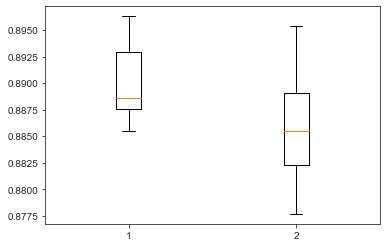

In [216]:
plt.boxplot(results_c)
plt.show()

# Test LR model on the test set

In [217]:
predictions = lm.predict(X_test)
pred_selected=lm_sel.predict(X_test[feats])

# What is the precision, recall, accuracy of your model?

In [218]:
print('For all features')
print(accuracy_score(Y_test, predictions))
print('For selected features')
print(accuracy_score(Y_test, pred_selected))

For all features
0.8927368927368927
For selected features
0.8928571428571429


previously we have done prediction by using all features now we have use to only selected features

In [221]:
rfe=list(x_train_new)

selected=X_train[rfe]

In [222]:
# Confusion Matrix 

from sklearn.metrics import confusion_matrix

print(confusion_matrix(Y_test, predictions))

[[7307  100]
 [ 792  117]]


In [223]:
# Classification Report
from sklearn.metrics import classification_report
print('This is for all features')
print(classification_report(Y_test, predictions))

This is for all features
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      7407
           1       0.54      0.13      0.21       909

    accuracy                           0.89      8316
   macro avg       0.72      0.56      0.58      8316
weighted avg       0.86      0.89      0.86      8316



In [224]:
print('This is for selected features')
print(classification_report(Y_test, pred_selected))

This is for selected features
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      7407
           1       0.57      0.08      0.15       909

    accuracy                           0.89      8316
   macro avg       0.73      0.54      0.54      8316
weighted avg       0.86      0.89      0.86      8316



# Which features are the most important from your model?

In [225]:
rfe=list(x_train_new)
print('These are the most important features for our model to make accurate predictions',rfe)

These are the most important features for our model to make accurate predictions ['poutcome_co', 'dec', 'mar', 'may', 'nov', 'oct', 'sep']


# Predictive model 2: Random Forest

Make a predictive model using random forest technique

In [226]:
from sklearn.ensemble import RandomForestClassifier

In [229]:
model = RandomForestClassifier(n_estimators=18)
model.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=18)

In [230]:
Y_pred=model.predict(X_test)
conf_mat=confusion_matrix(Y_test,Y_pred)
index=['actual No','actual yes']
columns=['predicted no','predicted yes']
demo=pd.DataFrame(conf_mat,index=index,columns=columns)
demo

,predicted no,predicted yes
actual No,7196,211
actual yes,591,318


In [231]:
from sklearn.metrics import *

In [232]:
print('Recall score',round(recall_score(Y_test,Y_pred),2))
print('Precision score',round(precision_score(Y_test,Y_pred),2))

Recall score 0.35
Precision score 0.6


In [233]:
a=[X_train,X_train[feats]]

In [234]:
for i in a:
    kfold = KFold(n_splits=10, random_state=7)    
    cv_results = cross_val_score(LogisticRegression(), i, Y_train, cv=kfold, scoring='accuracy')  
    print('Cross validation score:',cv_results.mean())

Cross validation score: 0.8901181788392535
Cross validation score: 0.8858792860975843


Cross validation score(for all features): 0.8910802412738141
           ,Cross validation score(for selected features): 0.8855786698274526¶

In [235]:
model_s = RandomForestClassifier(n_estimators=18)
model_s.fit(X_train[feats], Y_train)

RandomForestClassifier(n_estimators=18)

In [236]:
Y_pred_=model_s.predict(X_test[feats])

In [237]:
print('For all features')
print(accuracy_score(Y_test, Y_pred))
print('For selected features')
print(accuracy_score(Y_test, Y_pred_))

For all features
0.9035594035594036
For selected features
0.892015392015392


In [238]:
# this is for all for all features
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      7407
           1       0.60      0.35      0.44       909

    accuracy                           0.90      8316
   macro avg       0.76      0.66      0.69      8316
weighted avg       0.89      0.90      0.89      8316



In [239]:
# this is for all for selected features
classification_report(Y_test, Y_pred_)

'              precision    recall  f1-score   support\n\n           0       0.90      0.99      0.94      7407\n           1       0.53      0.10      0.17       909\n\n    accuracy                           0.89      8316\n   macro avg       0.72      0.54      0.55      8316\nweighted avg       0.86      0.89      0.86      8316\n'

In [240]:
print('Precision score for selected faetures',precision_score(Y_test,Y_pred_))

Precision score for selected faetures 0.5329341317365269


# Compare the performance of the Random Forest and the logistic model –

Accuracy score for selected features when we use logistic model is #### 0.8923 and when we use Random forest model is #### 0.8915
Precision score for selected features when we use logistic model is #### 0.5510 and when we use Random forest model is #### 0.5204
Cross val score for selected features when we use logistic model is #### 0.88557 and when we use Random forest model is #### 0.8855

# Which metric did you choose and why?

The next step after implementing a machine learning algorithm is to find out how effective is the model based on metric and datasets. Different performance metrics are used to evaluate different Machine Learning Algorithms. For example a classifier used to distinguish between images of different objects; we can use classification performance metrics such as, Precision score,accuracy score , recall score and Cross val score etc.

The machine learning model cannot be simply tested using the training set, because the output will be prejudiced, because the process of training the machine learning model has already tuned the predicted outcome to the training dataset. Therefore in order to estimate the generalization error, the model is required to test a dataset which it hasn’t seen yet; giving birth to the term testing dataset.

Therefore for the purpose of testing the model, we would require a labelled dataset. This can be achieved by splitting the training dataset into training dataset and testing dataset. This can be achieved by various techniques such as, k-fold cross validation,

# Which model has better performance on the test set?

For binary classification model evaluation between random forest and logistic regression, our work focused on four distinct simulated datasets: (1) increasingthe variance in the explanatory and noise variables, (2) increasing the number of noise variables, (3) increasing the number of explanatory variables, (4) increasing the number of observations.

To benchmark and comparing classification scores between random forest and logistic regression, metrics such as accuracy, area under the curve, true positive rate, false positive rate, and precision were analyzed. To provide statistical quantification as to whether a difference in model performance is conclusive enough to state the difference is significant or if the observed difference is by random chance

Logistic has got better accuracy score compared to random forset, hence we can say that it has better performance